# 0. Simulate real signal data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

%matplotlib inline
%config InlineBackend.figure_format='retina'

## 0.1 Pure signal data

Text(0, 0.5, 'amplitude')

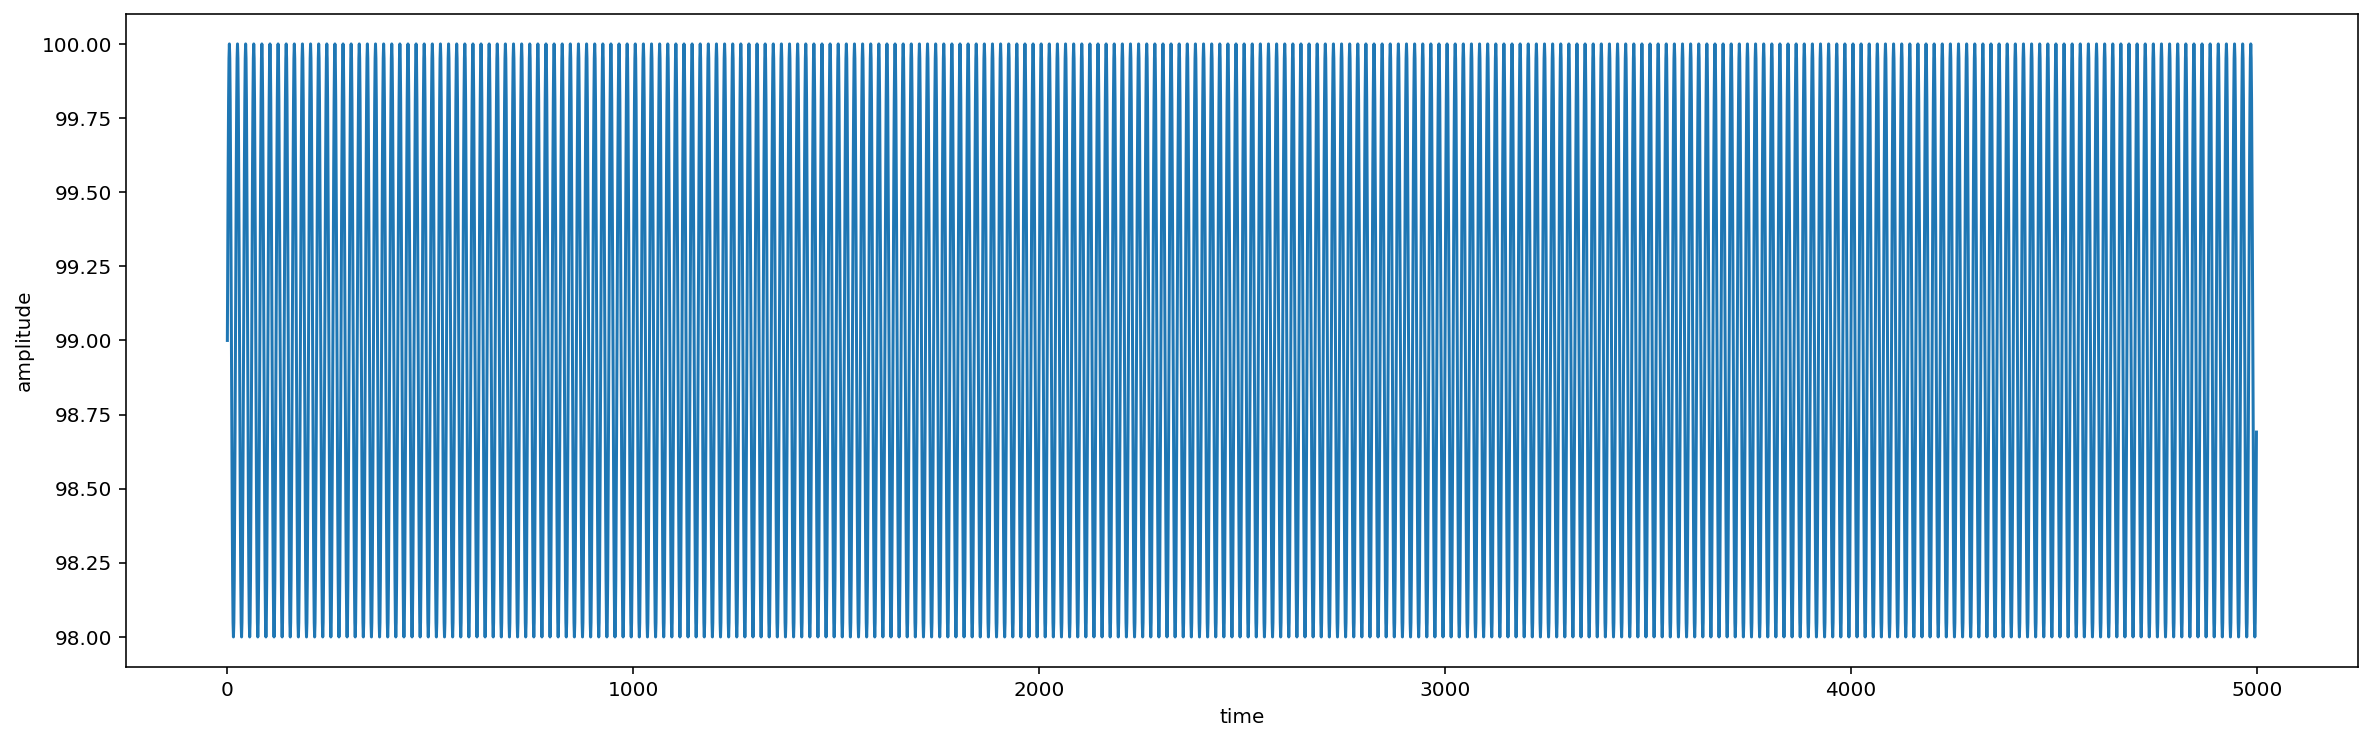

In [3]:
# define parameters
time=5000
x =np.arange(time)
freq = 10

# sine wave
ps=np.sin(2*np.pi*freq*(x/200))+99

plt.figure(figsize=(20,6))
plt.plot(x,ps)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.2 Noise form

Text(0, 0.5, 'amplitude')

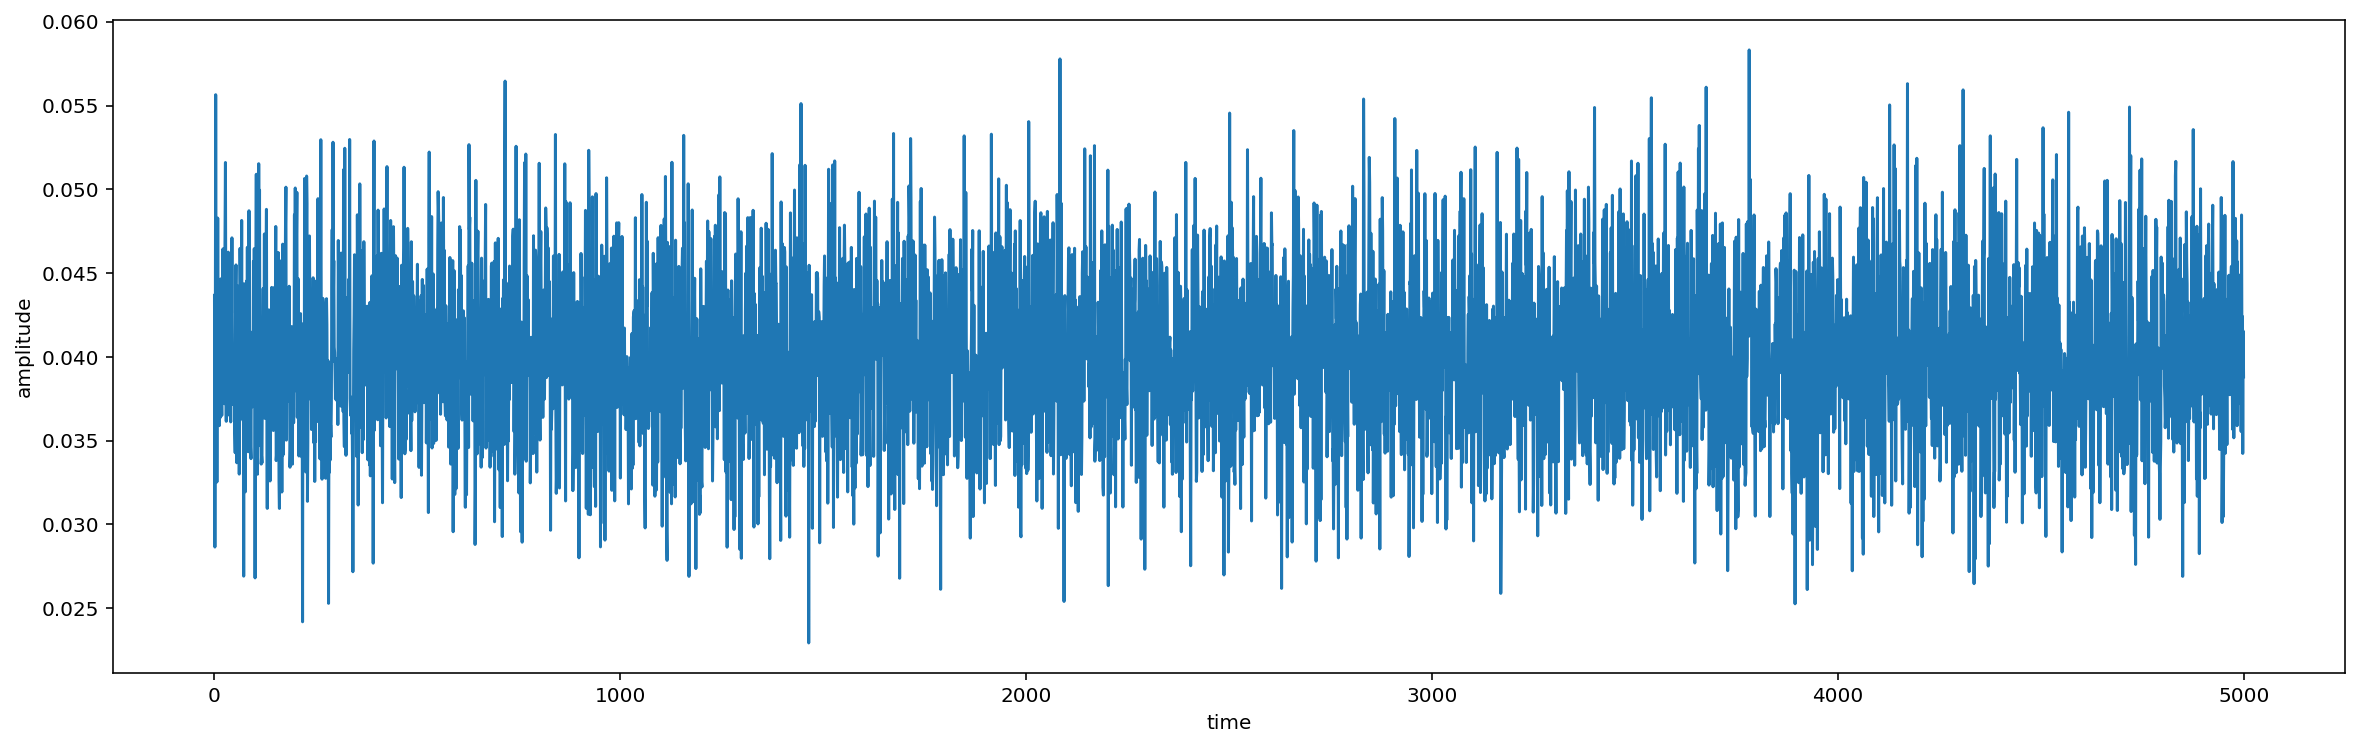

In [4]:
#rd=np.random.normal(size=time,)
#nf=(np.max(rd)-rd)/100
nf=np.random.normal(.04,.005,time)

plt.figure(figsize=(20,6))
plt.plot(nf)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.3 Atmos signal data  = Pure + Noise

Text(0, 0.5, 'amplitude')

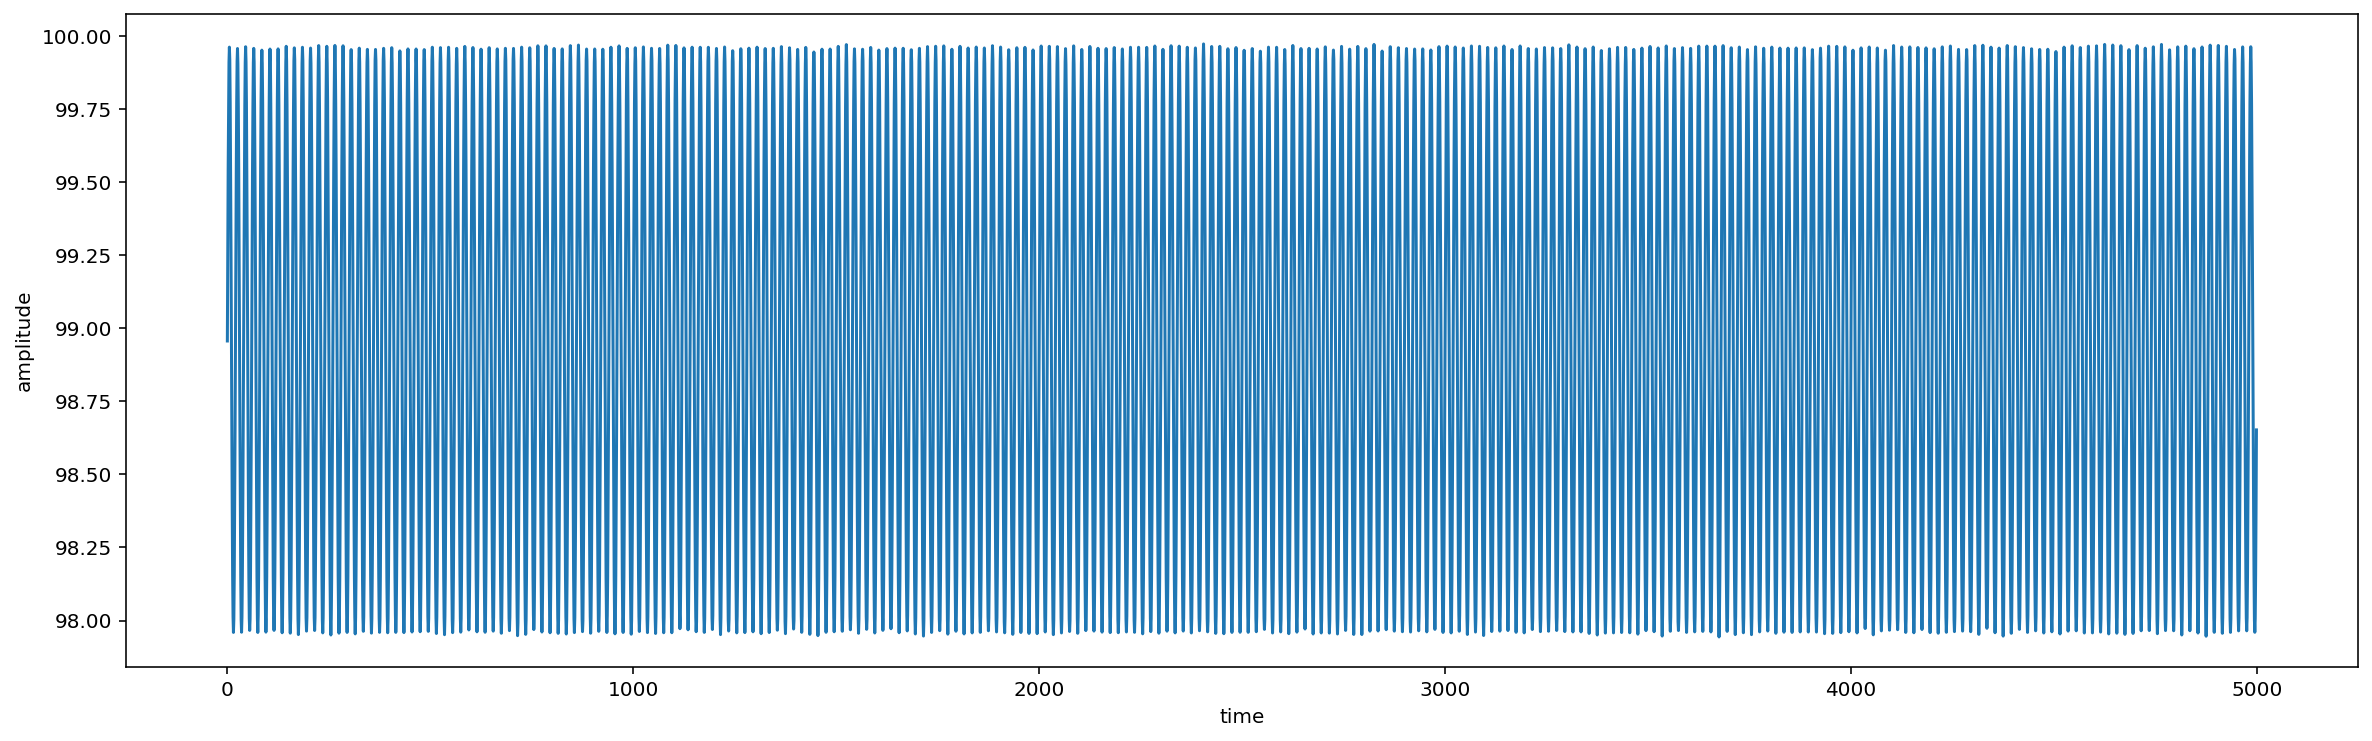

In [5]:
at = -nf+ps

plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

(0, 100)

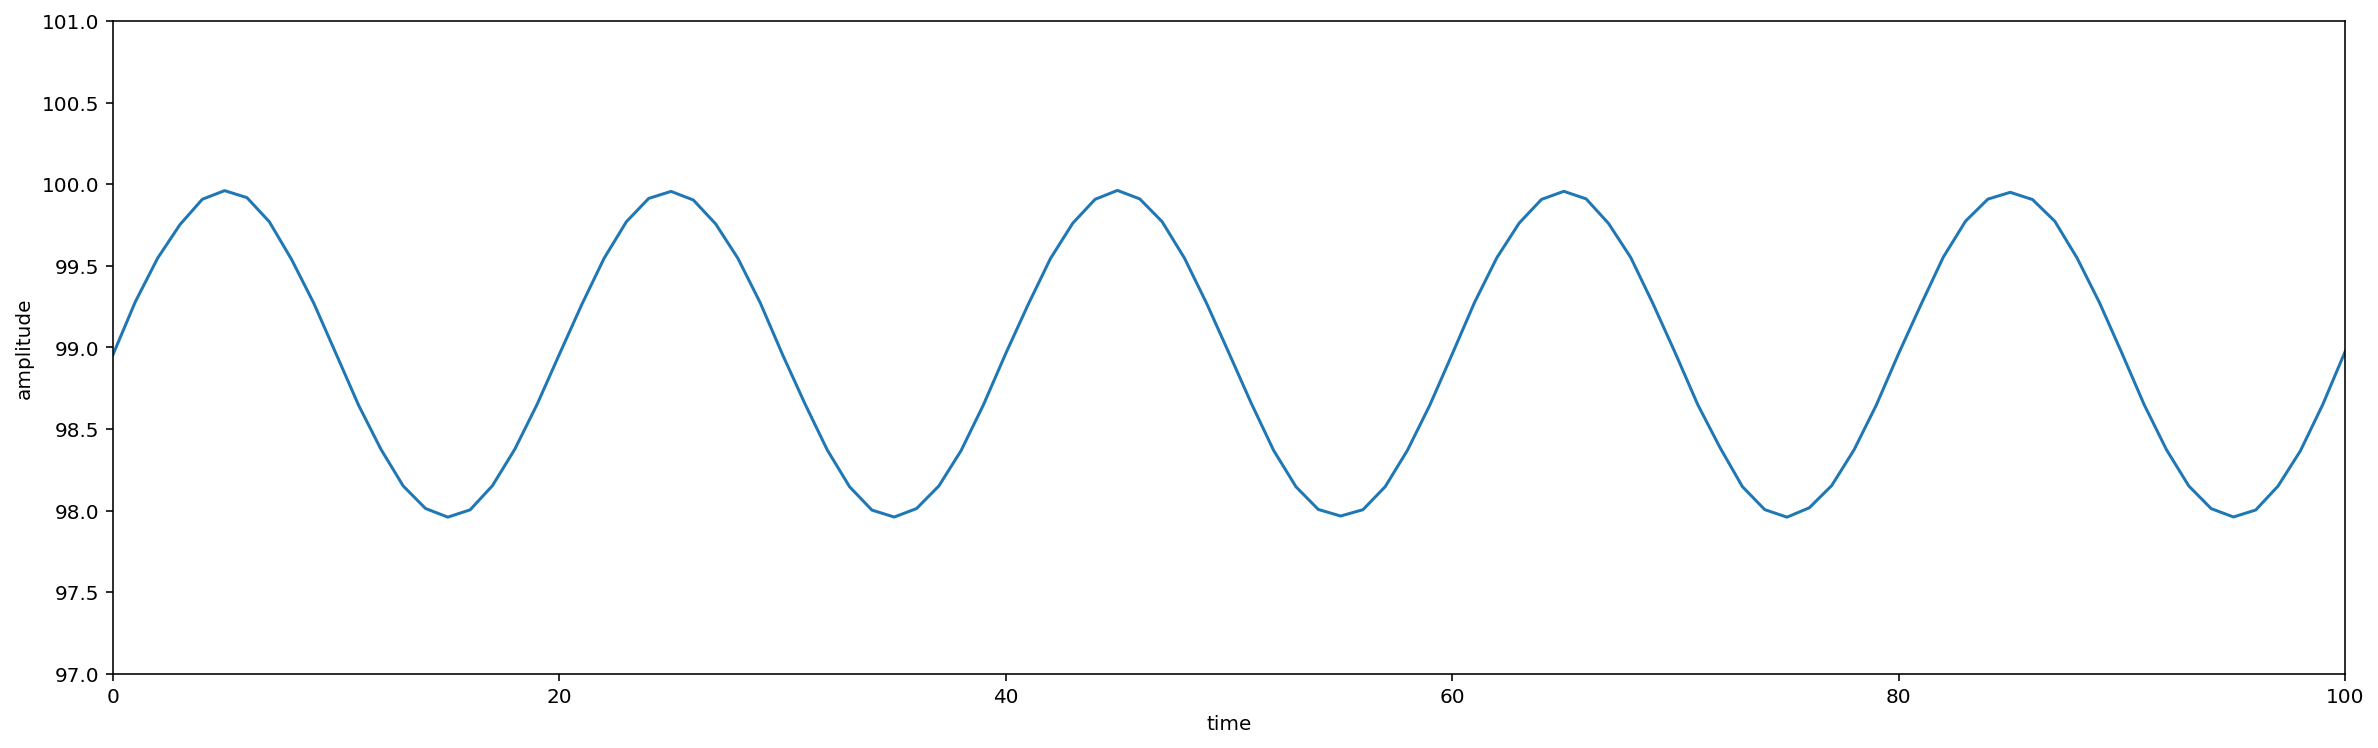

In [6]:
plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

plt.ylim(97,101)
plt.xlim(0,100)

## 0.4 Lose form

In [7]:
#parameters
sigma=50 #50
mu=100 #100
sizeLoss=10000 #10000
#time parameter
x=np.arange(-(time-(time-mu)),(time-mu))
#x=np.arange(-100,10000)
#print(x.size)

#gausian distribution
#ga=((1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2)))
gau=-((1/np.sqrt(2*np.pi*sigma**2))*np.exp((-(x-mu)**2)/(2*sigma**2)))*sizeLoss
print(gau)
print(x)

[-0.02676605 -0.02898951 -0.03138513 ... -0.         -0.
 -0.        ]
[-100  -99  -98 ... 4897 4898 4899]


Text(0, 0.5, 'loss signal data')

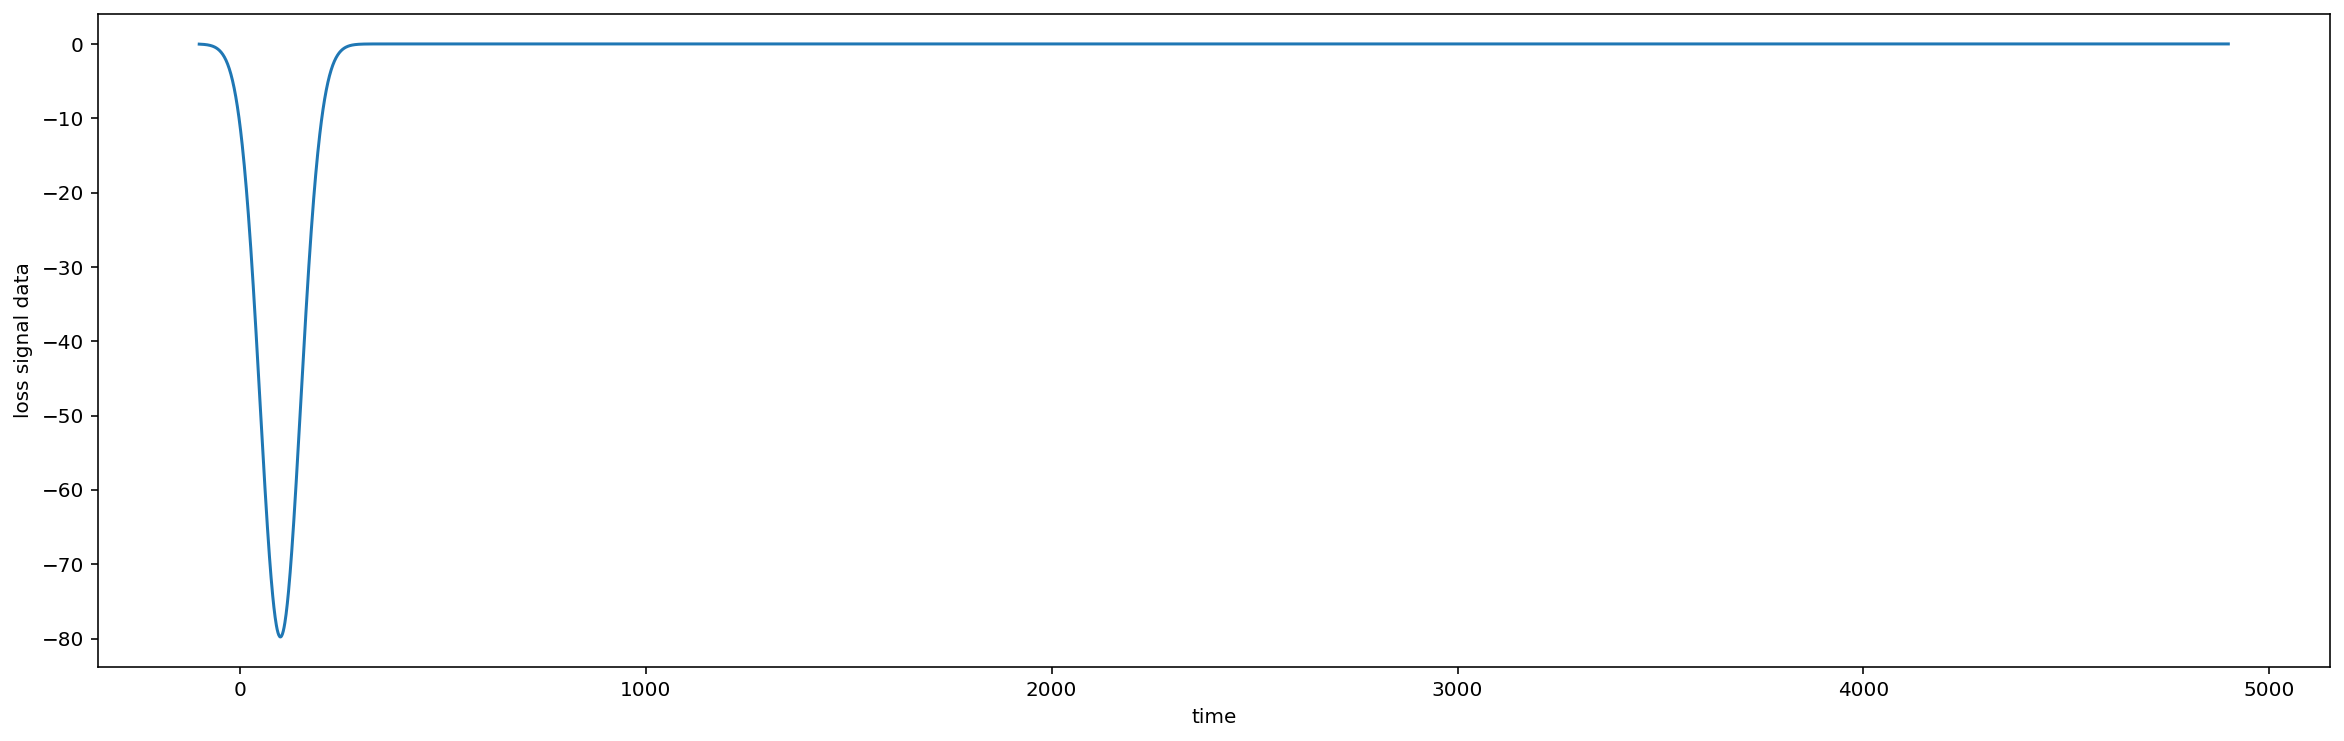

In [8]:
plt.figure(figsize=(20,6))
plt.plot(x,gau)
plt.xlabel('time')
plt.ylabel('loss signal data')

# 0.5 Real signal data

Text(0, 0.5, 'loss signal data')

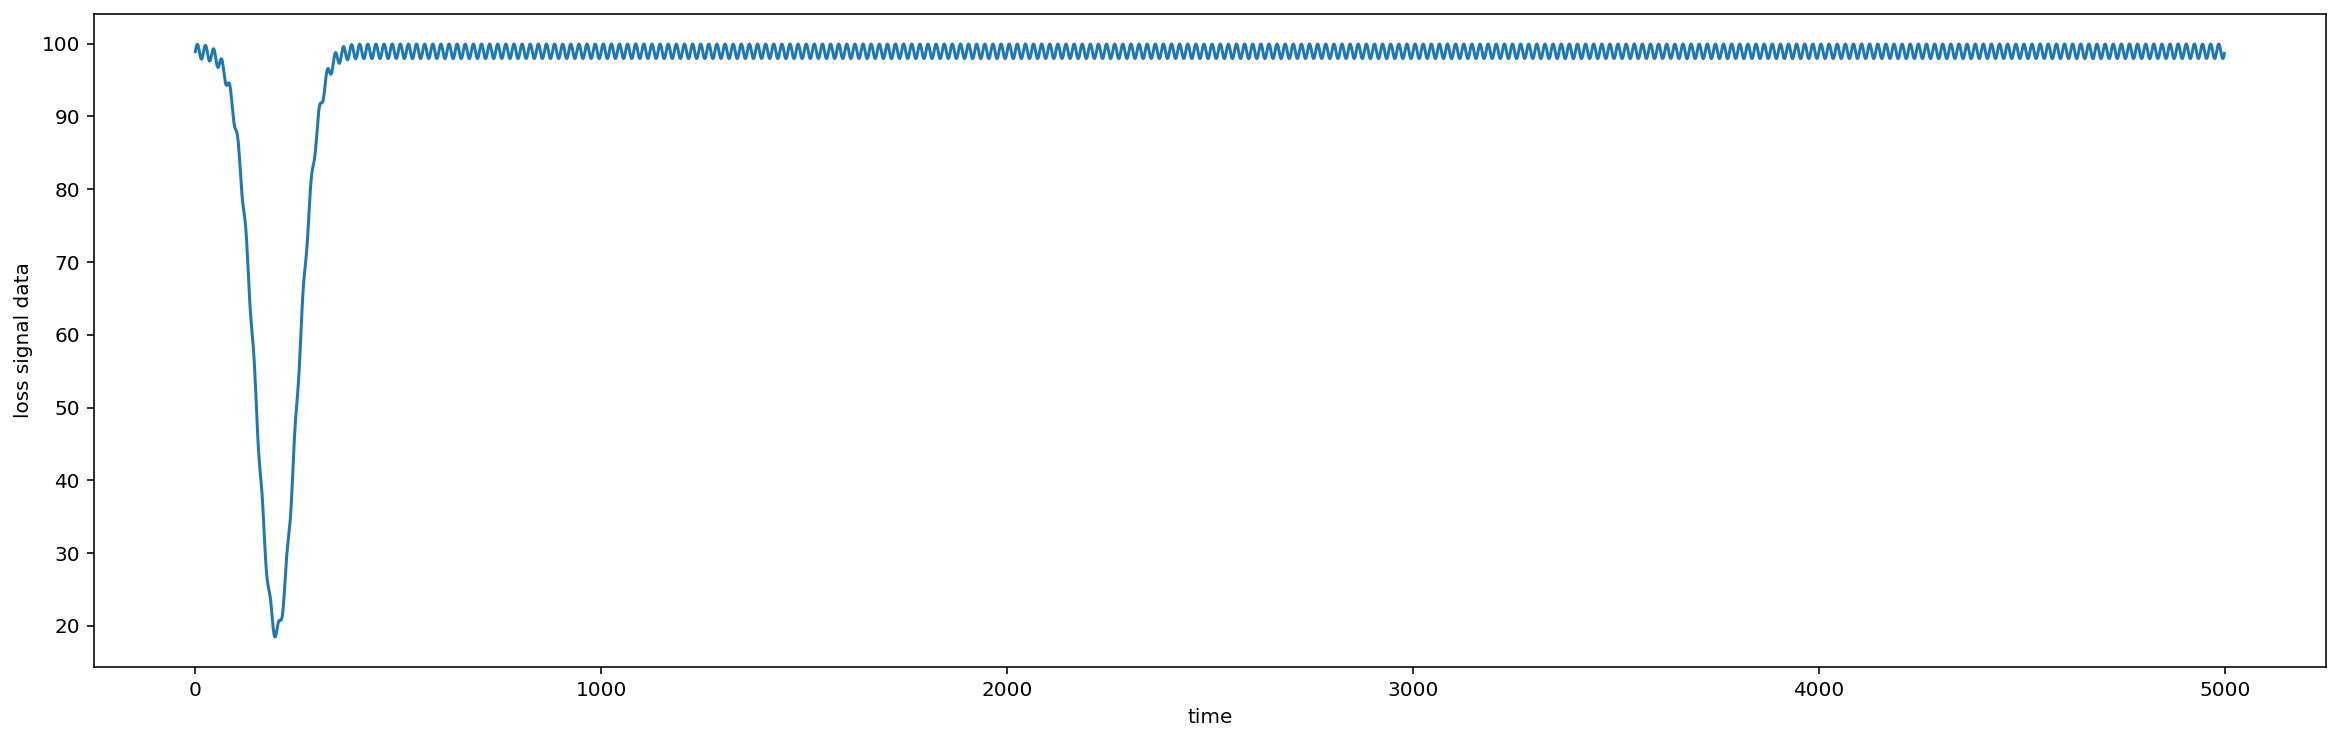

In [9]:
real=at+gau

plt.figure(figsize=(20,6))
plt.plot(real)
plt.xlabel('time')
plt.ylabel('loss signal data')

In [10]:
np.max(real)

99.97246480418049

# 1. Statistical analysis of the signal

## 1.1 Atmos signal data

Text(0, 0.5, 'amplitude')

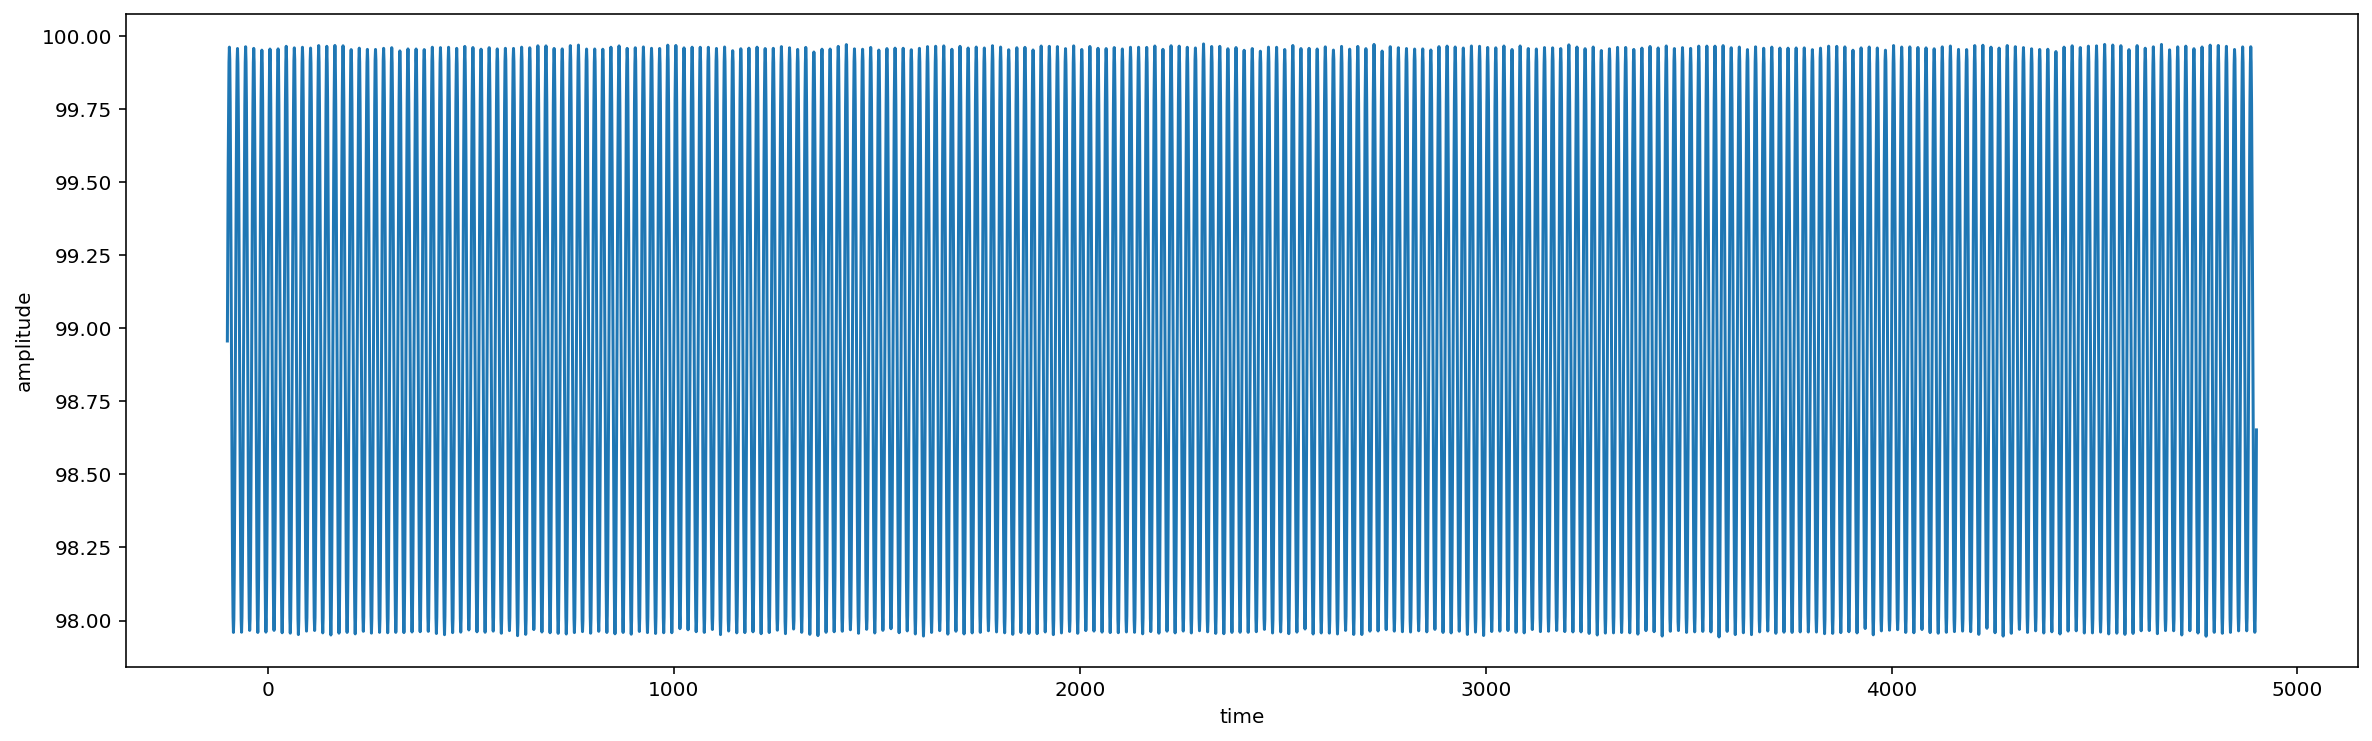

In [11]:
plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

In [12]:
at_max=np.max(at)
at_mean=np.mean(at)
at_min=np.min(at)
at_std=np.std(at)

print('Max of Atmo = '+ str(at_max))
print('Mean of Atmo = '+ str(at_mean))
print('Min of Atmo = '+ str(at_min))
print('Std of Atmo = '+ str(at_std))

Max of Atmo = 99.97246480418049
Mean of Atmo = 98.95990205571599
Min of Atmo = 97.94390643627162
Std of Atmo = 0.7071450051309284


# 1.2 Real signal data

Text(0, 0.5, 'loss signal data')

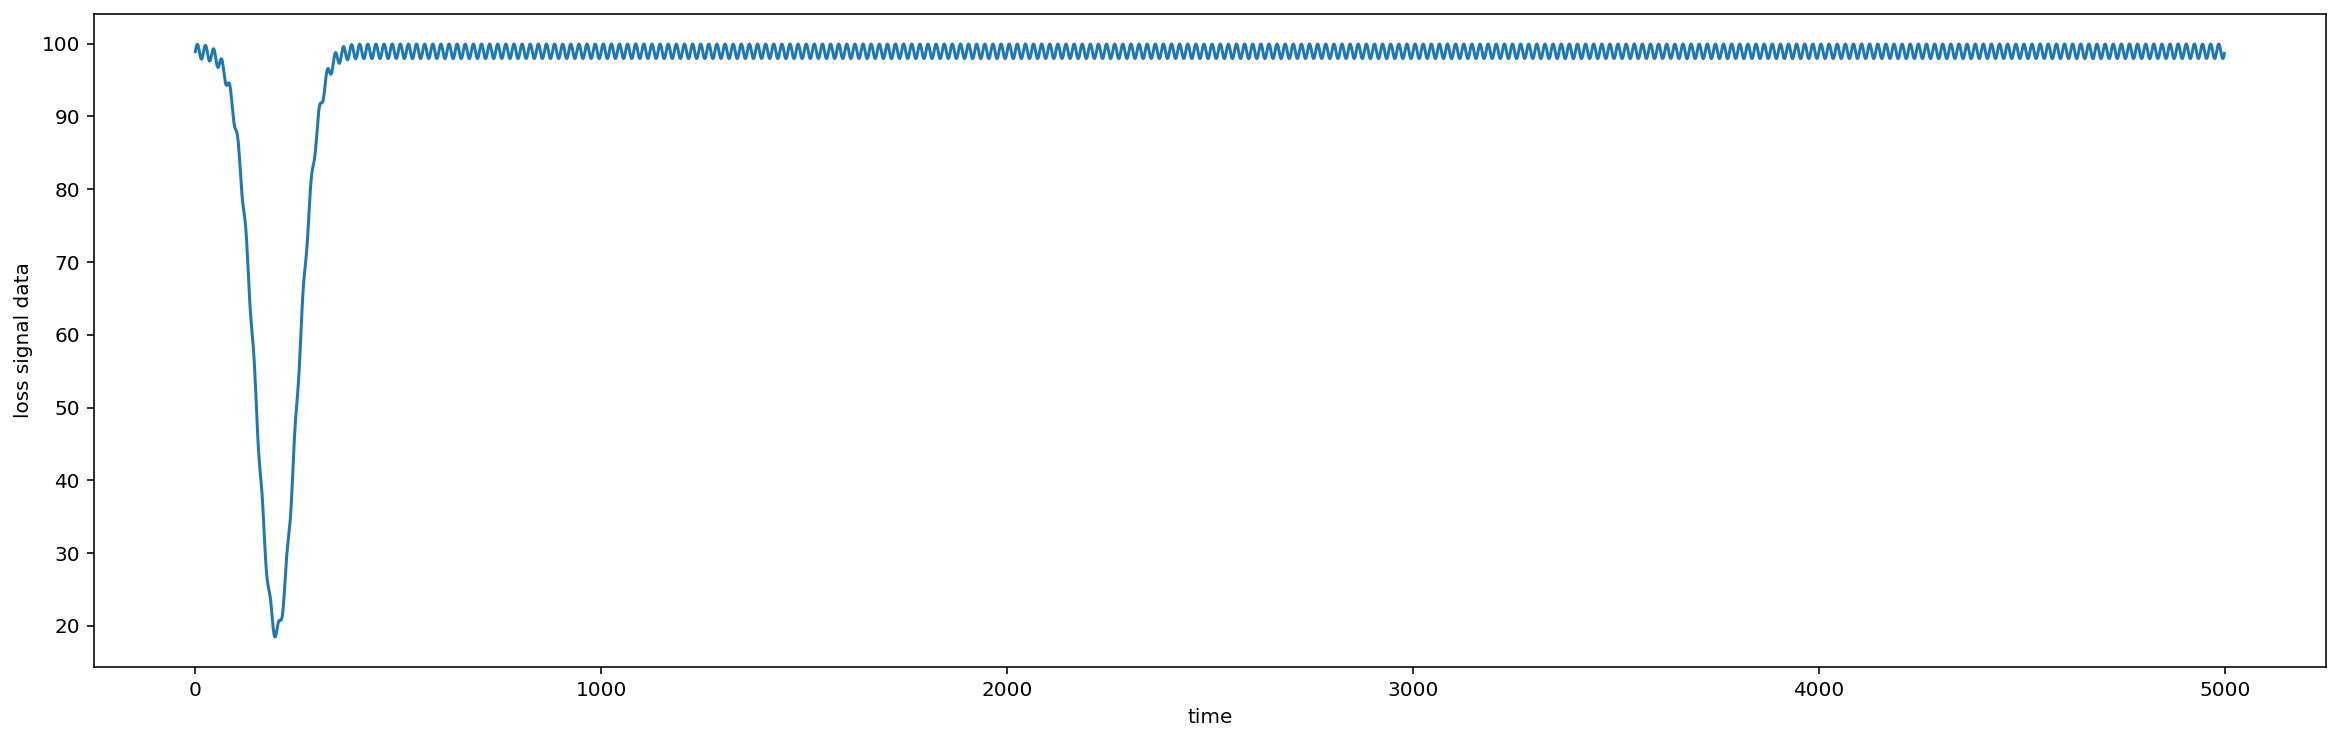

In [13]:
plt.figure(figsize=(20,6))
plt.plot(real)
plt.xlabel('time')
plt.ylabel('loss signal data')

In [14]:
real_max=np.max(real)
real_mean=np.mean(real)
real_min=np.min(real)
real_std=np.std(real)

print('Max of Real signal = '+ str(real_max))
print('Mean of Real signal = '+ str(real_mean))
print('Min of Real signal = '+ str(real_min))
print('Std of Real signal = '+ str(real_std))

Max of Real signal = 99.97246480418049
Mean of Real signal = 96.9599627572801
Min of Real signal = 18.476514544185903
Std of Real signal = 10.45646286703249


# 1.3 Comparing by Graph

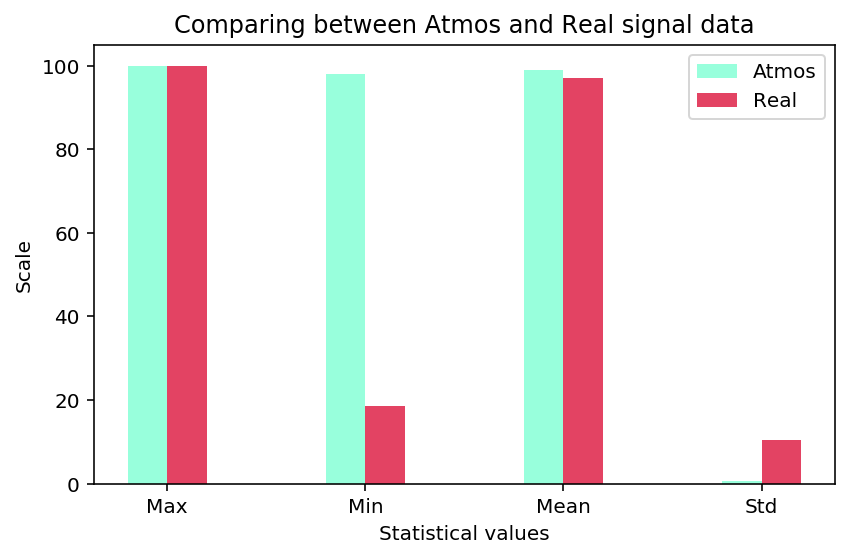

In [15]:
labels=('Max','Min','Mean','Std')
data_at=[at_max, at_min, at_mean, at_std]
data_real=[real_max, real_min, real_mean, real_std]
n_group=4


fig, ax = plt.subplots()
index=np.arange(n_group)
bar_width=.2
opacity=.8

rects1=plt.bar(index, data_at, bar_width, alpha=opacity, color='aquamarine', label='Atmos')
rects2=plt.bar(index+bar_width, data_real, bar_width, alpha=opacity, color='crimson', label='Real')

plt.xlabel('Statistical values')
plt.ylabel('Scale')
plt.title('Comparing between Atmos and Real signal data')
plt.xticks(index+bar_width-.1, labels)
plt.legend()

plt.tight_layout()
plt.show()

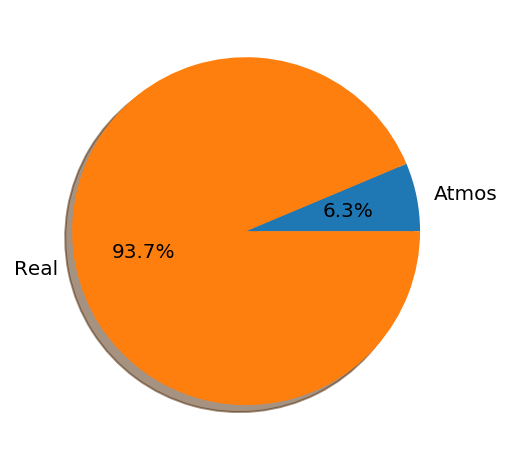

In [20]:
plt.pie([at_std,real_std],labels=['Atmos','Real'],shadow=True, autopct = '%1.1f%%')
plt.show()

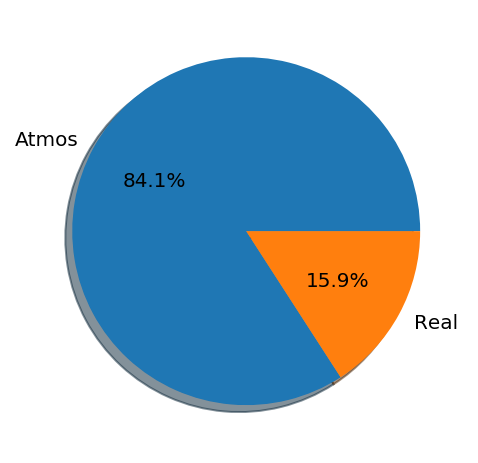

In [21]:
plt.pie([at_min,real_min],labels=['Atmos','Real'],shadow=True, autopct = '%1.1f%%')
 
plt.show()

# 1.4 Distribution

In [200]:
import seaborn as sns

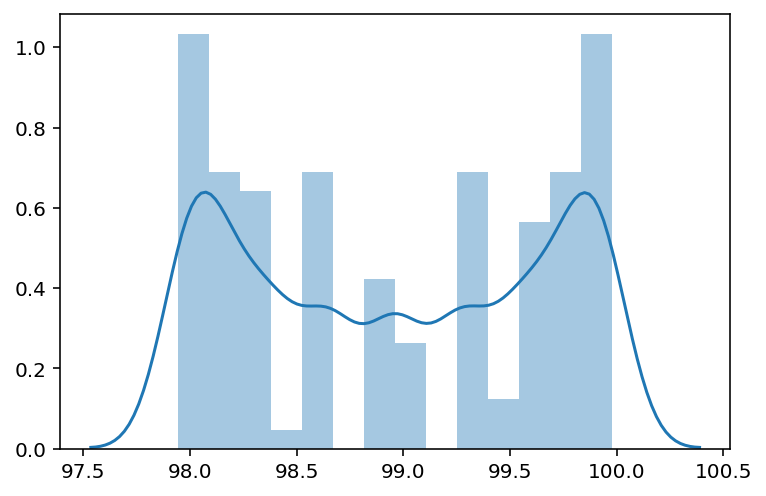

In [202]:
sns.distplot(at)

In [215]:
print('Skewness =' +str(skew(at)))
print('Kurtosis =' +str(kurtosis(at)))

Skewness =0.00015100421335420832
Kurtosis =-1.4999928774444438


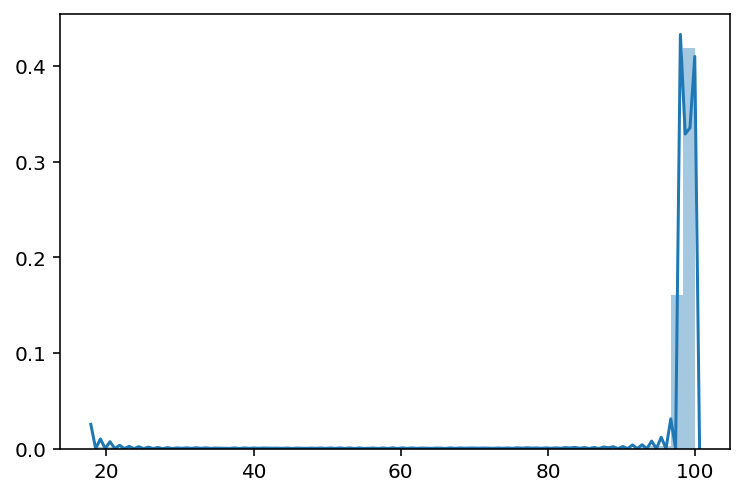

In [201]:
sns.distplot(real)

In [214]:
from scipy.stats import skew , kurtosis

print('Skewness =' +str(skew(real)))
print('Kurtosis =' +str(kurtosis(real)))

Skewness =-5.851482652157482
Kurtosis =34.81917147427304


# 2. Classification by Machine learning

## 2.1 Isolation Forest

C:\Users\parinya.dua\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\parinya.dua\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\parinya.dua\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


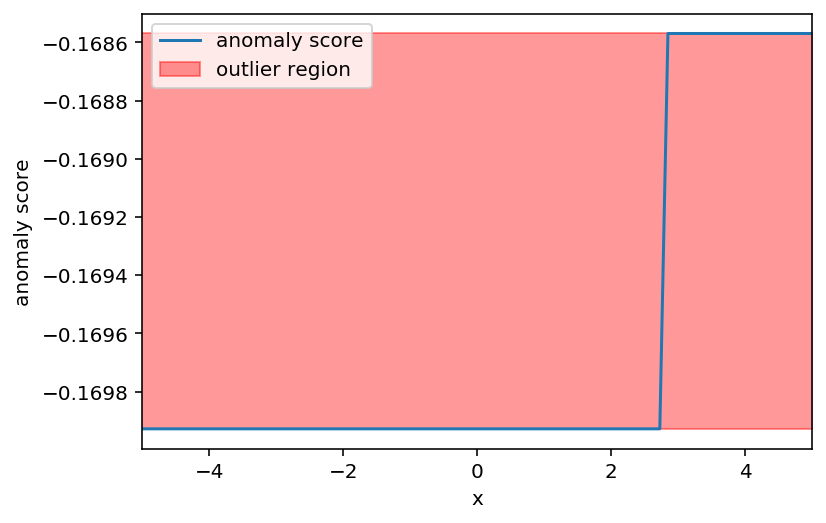

In [216]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(x.reshape(-1, 1))
xx = np.linspace(-6, 6, 100).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('x')
plt.xlim([-5, 5])
plt.show()

In [ ]:
isolation_forest = IsolationForest(n_estimators=100)

isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(np.min(real), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

In [22]:
type(real)

numpy.ndarray

In [23]:
import pandas as pd
pd_real=pd.Series(real)

In [24]:
pd_real

0       98.929560
1       99.251376
2       99.516381
3       99.719406
4       99.871826
          ...    
4995    97.959867
4996    98.006524
4997    98.156745
4998    98.370667
4999    98.652170
Length: 5000, dtype: float64

In [25]:
type(pd_real)

pandas.core.series.Series

In [ ]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

In [28]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['pd_real'].values.reshape(-1, 1))

AttributeError: 'list' object has no attribute 'values'